## Anàlisis de l'histograma d'una imatge amb filtre de variança

Amb el filtre de variança he aconseguit que els canvis de color em quedin molt accentuats. A diferència de l'histrograma sobre l'imatge normal, ara els canvis de to de la fusta es presenten en forma de pics molt accentuats, casi com "gratacels".

Així resulta més senzill seleccionar els màxims de manera fiable

In [13]:
import pandas as pd
from matplotlib import *
import numpy as np

Importam les dades de l'histograma:

In [2]:
dfm = pd.read_csv('PH01S_var.csv',names=['distance','values'], index_col='distance', sep='\t')

In [3]:
dfm.head(2)

,values
distance,
0,53.0000
1,37.0067


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


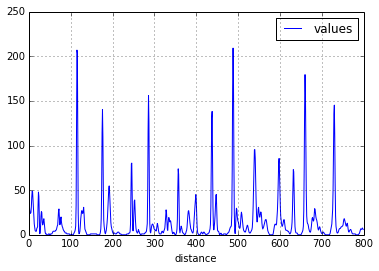

In [4]:
%pylab inline
dfm.plot()

A continuació faig un $treshold$ manual ( a ull ) per seleccionar les dades que sobrepassen un valor llindar

In [14]:
dff = dfm[dfm > 60]

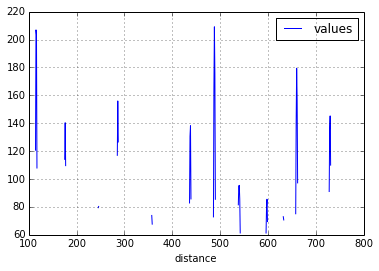

In [15]:
dff.plot()

##Algorismes de thresholding


In [7]:
import numpy as np, datetime
# array of zeros and ones interleaved
#lrg = np.arange(2).reshape((2,-1)).repeat(1000000,-1).flatten()

t0 = datetime.datetime.now()
flt = dfm[dfm>60]
print datetime.datetime.now() - t0

t0 = datetime.datetime.now()
flt = np.array(filter(lambda x:x>60, dfm))
print datetime.datetime.now() - t0

0:00:00
0:00:00.016000


##Per comptar illes de dades en mars de NaNs
obtenir el nombre de pics que es generen amb un valor de threshold en concret per poder buclear-ho i arribar a un valor optim o obtinguem un el nombre de pics preestablert que ha de tenir la mostra

In [22]:
a = np.empty((15,10))
a.fill(np.nan)
a[7,6] = 76
a[8,5] = 85
a[9,5] = 95
a[9,7] = 97

In [23]:
a

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  76.,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  85.,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  95.,  nan,  97.,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  n

In [18]:
nans = np.isnan(a)
nancols = np.all(nans, axis=0) # 10 booleans, True where col is all NAN
nanrows = np.all(nans, axis=1) # 15 booleans

In [20]:
firstcol = nancols.argmin() # 5, the first index where not NAN
firstrow = nanrows.argmin() # 7

lastcol = len(nancols) - nancols[::-1].argmin() # 8, last index where not NAN
lastrow = len(nanrows) - nanrows[::-1].argmin() # 10




In [21]:
a[firstrow:lastrow,firstcol:lastcol]

array([[ nan,  76.,  nan],
       [ 85.,  nan,  nan],
       [ 95.,  nan,  97.]])

Un cop retirats els valors NaN generats per el treshold ja podem fer les diferencies per obtenir els canvis de pendent.

Com que ara els màxims son molt més nets no fa falta agrupar les dades per fer les diferències.

In [17]:
dff=dff.fillna(0)
func = lambda x: x>0, dff['values']
dffgrouped=dff['values'].groupby(func, axis=0)

In [2]:
from scipy.signal import argrelextrema

In [15]:
numpy.take?

Provar amb $\texttt{numpy.take}$ per obtenir els index de nparray extret amb $\texttt{argrelextrema}$

In [32]:
argrelextrema(dff.values, np.greater)

(array([115, 176, 246, 286, 357, 438, 488, 540, 598, 632, 660, 730], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

Així ens queden les pendents molt netes i llestes per a treure els punts on hi ha canvi de pendet. Amb l'index de $\texttt{distance}$ tenim la referència de la posició de cada pic per extreure'n les distancies.

Molt senzill!